In [25]:
from datasets import load_dataset


from pathlib import Path

SLIMPAJAMA_ROOT = "/nvmefs1/mk/datasets/cerebras___slim_pajama-627_b"
V2_REDPAJAMA_ROOT = "/nvmefs1/mk/datasets/redpajama-data-v2"


# Define the path to the Arrow file
p = "/nvmefs1/mk/datasets/cerebras___slim_pajama-627_b/default/0.0.0/2d0accdd58c5d5511943ca1f5ff0e3eb5e293543/slim_pajama-627_b-train-00001-of-10190.arrow"
dataset = load_dataset("arrow", data_files=p, split="train")

for row in dataset:
    print(row)
    break

/nvmefs1/daranhe/.conda/envs/default/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'text': 'Charlie McGlynn\nPosted:\t March 14, 2012 Categories: web\tAuthor: Charlie\tTags: infographics\tComment: 0\nThis is a great new site that makes making infographics fun and easy. Visual.ly\n"The startup, which has raised $2 million in VC funding to date, unveiled the self-service platform at SXSW today. With just a few clicks, users can choose a theme, select a dataset from a drop-down menu, and create an infographic with little or no effort. For example, plug in a Twitter hashtag or Facebook account, and you can watch Visual.ly spit out various metrics represented visually–basic statistics about growth, location, demographics, engagement, and so on. "If I\'m a marketing manager, and want to go present [this data] to my boss, all I have to do is authenticate [with Facebook or Twitter]," Langille says. "I don\'t have to do anything. I don\'t have to find a designer. If I don\'t like a theme, I can just swap it out in one click."\nvia: fastcodesign.com\nYMCA Andover\nUR Christma

/nvmefs1/daranhe/.conda/envs/default/lib/python3.10/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [27]:
df = dataset.to_pandas()
df["source"] = df.meta.map(lambda x: x["redpajama_set_name"])
df["length"] = df.text.map(len)

In [28]:
df

,text,meta,source,length
0,"Charlie McGlynn\nPosted:\t March 14, 2012 Cate...",{'redpajama_set_name': 'RedPajamaCommonCrawl'},RedPajamaCommonCrawl,1177
1,The Institute for Continuing Legal Education a...,{'redpajama_set_name': 'RedPajamaC4'},RedPajamaC4,665
2,/**\n * --------------------------------------...,{'redpajama_set_name': 'RedPajamaGithub'},RedPajamaGithub,2047
3,Reading the druidic markings left all around t...,{'redpajama_set_name': 'RedPajamaC4'},RedPajamaC4,1864
4,After a very busy year in which David and I tr...,{'redpajama_set_name': 'RedPajamaC4'},RedPajamaC4,14377
...,...,...,...,...
117683,Stressed and tested: How the mortgage stress t...,{'redpajama_set_name': 'RedPajamaCommonCrawl'},RedPajamaCommonCrawl,9729
117684,"When you try to control too much, you enjoy to...",{'redpajama_set_name': 'RedPajamaC4'},RedPajamaC4,7427
117685,Jason David Frank's cause of death: Wife confi...,{'redpajama_set_name': 'RedPajamaCommonCrawl'},RedPajamaCommonCrawl,5059
117686,From London With Love | Athenaeum Life | The A...,{'redpajama_set_name': 'RedPajamaCommonCrawl'},RedPajamaCommonCrawl,4134


In [27]:
df[["source"]].groupby(df["source"]).count().source

source
RedPajamaArXiv              318
RedPajamaBook                33
RedPajamaC4               64409
RedPajamaCommonCrawl      37302
RedPajamaGithub            4236
RedPajamaStackExchange     5960
RedPajamaWikipedia         5430
Name: source, dtype: int64

In [29]:
# how to normalize the series?
def norm(s):
    return s / s.sum()


norm(df["length"].groupby(df["source"]).sum())

source
RedPajamaArXiv            0.037192
RedPajamaBook             0.032804
RedPajamaC4               0.287348
RedPajamaCommonCrawl      0.545544
RedPajamaGithub           0.038888
RedPajamaStackExchange    0.028249
RedPajamaWikipedia        0.029975
Name: length, dtype: float64

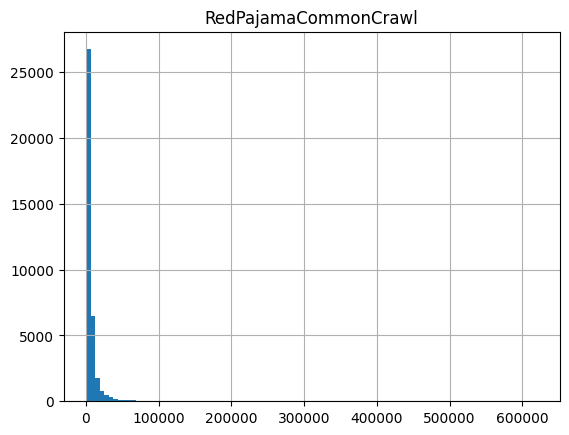

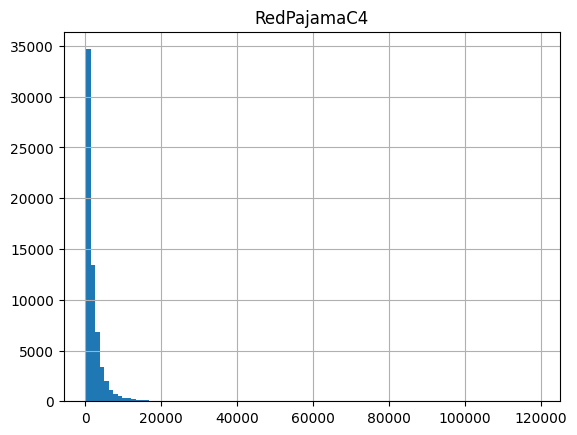

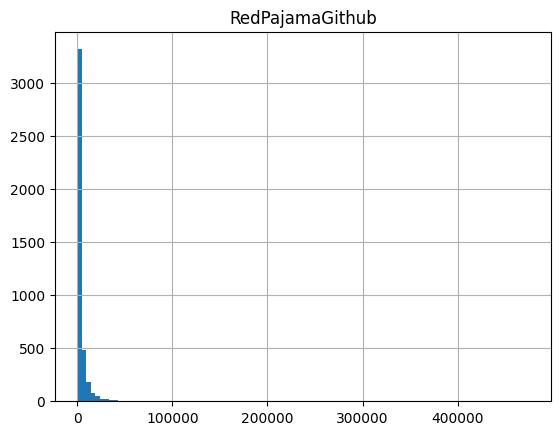

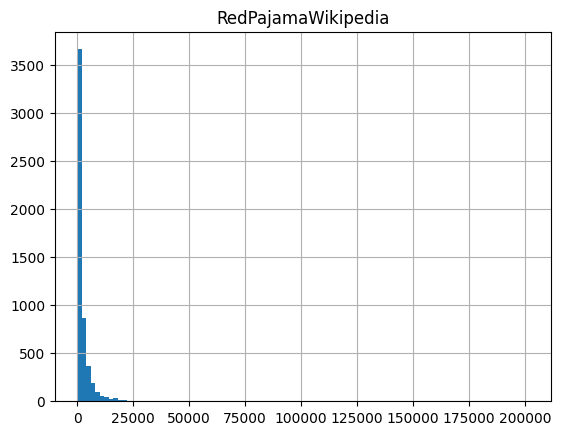

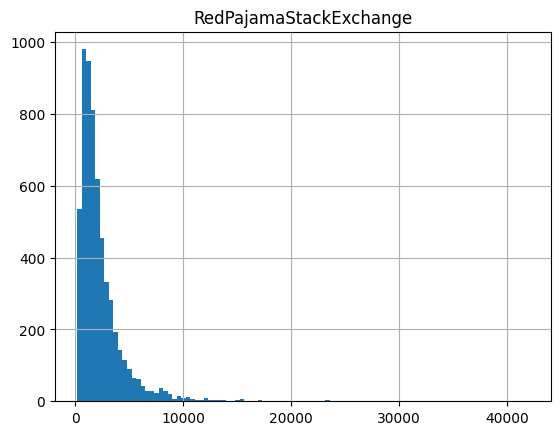

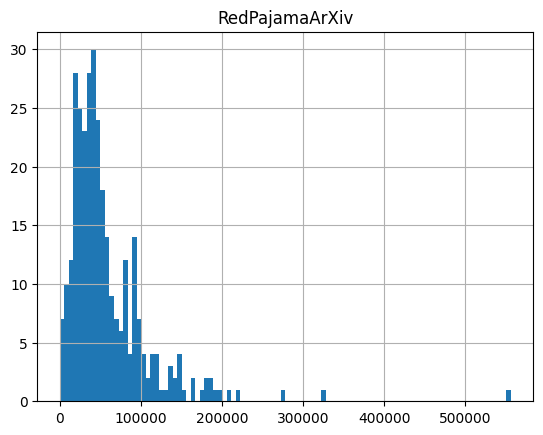

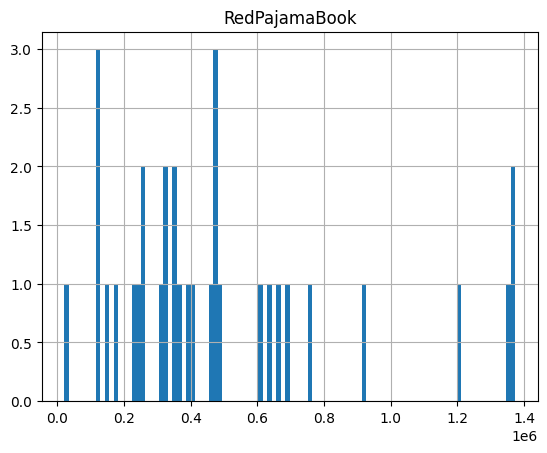

In [19]:
import matplotlib.pyplot as plt

for i, source in enumerate(df["source"].unique()):
    plt.figure()
    plt.title(source)
    df[df.source == source].text.map(len).hist(bins=100)

In [23]:
from collections import defaultdict
import numpy as np

from pathlib import Path

total_tokens = 0
tokens_by_ds = defaultdict(int)
for p in sorted(
    Path("/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens").rglob("*.npy")
):
    data = np.load(p)
    print(p, data.shape, data.dtype, data.shape[0] * data.shape[1])
    total_tokens += data.shape[0] * data.shape[1]
    tokens_by_ds[p.parent.parent.name] += data.shape[0] * data.shape[1]
print(f"Total tokens: {total_tokens}")
tokens_by_ds

/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/arxiv/dataset_00000/00000.npy (66, 4096) uint16 270336
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/book/dataset_00000/00000.npy (137, 4096) uint16 561152
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/c4-rp/dataset_00000/00000.npy (300, 4096) uint16 1228800
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/c4-rp/dataset_00000/00001.npy (66, 4096) uint16 270336
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/cc/dataset_00000/00000.npy (300, 4096) uint16 1228800
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/cc/dataset_00000/00001.npy (300, 4096) uint16 1228800
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/cc/dataset_00000/00002.npy (300, 4096) uint16 1228800
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/cc/dataset_00000/00003.npy (300, 4096) uint16 1228800
/nvmefs1/daranhe/llm-shearing/out/data_preparation/tokens/cc/dataset_00000/00004.npy (300, 4096) u

defaultdict(int,
            {'arxiv': 270336,
             'book': 561152,
             'c4-rp': 1499136,
             'cc': 6701056,
             'github': 446464,
             'stackexchange': 204800,
             'wiki': 446464})

In [24]:
DS_SAMPLING_RATES = {
    "arxiv": 0.025,
    "book": 0.045,
    "c4-rp": 0.15,
    "cc": 0.67,
    "github": 0.045,
    "stackexchange": 0.02,
    "wiki": 0.045,
}
# np.dot(np.ones(len(DS_SAMPLING_RATES)), np.array(list(DS_SAMPLING_RATES.values())))
for ds, ratio in DS_SAMPLING_RATES.items():
    print(
        f"{ds}: needed: {1e7 * ratio} tokens (got {tokens_by_ds[ds]}). {1e7 * ratio / 4096} seqs (got {tokens_by_ds[ds] / 4096})"
    )

arxiv: needed: 250000.0 tokens (got 270336). 61.03515625 seqs (got 66.0)
book: needed: 450000.0 tokens (got 561152). 109.86328125 seqs (got 137.0)
c4-rp: needed: 1500000.0 tokens (got 1499136). 366.2109375 seqs (got 366.0)
cc: needed: 6700000.0 tokens (got 6701056). 1635.7421875 seqs (got 1636.0)
github: needed: 450000.0 tokens (got 446464). 109.86328125 seqs (got 109.0)
stackexchange: needed: 200000.0 tokens (got 204800). 48.828125 seqs (got 50.0)
wiki: needed: 450000.0 tokens (got 446464). 109.86328125 seqs (got 109.0)


In [41]:
from streaming import StreamingDataset

sizes = {}
for p in Path("/nvmefs1/daranhe/llm-shearing/out/data_preparation/mds").iterdir():
    if p.is_dir() and p.name != "eval":
        dataset = StreamingDataset(local=str(p))
        sizes[p.name] = len(dataset)
sizes

RuntimeError: No `remote` provided, but local file /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds/book/index.json does not exist either

In [40]:
sum(sizes.values()) * 4096 / 1e9

5.134340096

In [36]:
# get length of bytes
len(ts)

8192

/nvmefs1/daranhe/.conda/envs/default/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Validating dataset: eval_merge in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 845.31it/s]


Validating dataset: book in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 652.21it/s]


Validating dataset: stackexchange in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 671.53it/s]


Validating dataset: c4-rp in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 571.10it/s]


Validating dataset: github in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 648.30it/s]


Validating dataset: wiki in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 659.97it/s]


Validating dataset: cc in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 496.87it/s]


Validating dataset: arxiv in /nvmefs1/daranhe/llm-shearing/data/for_prune


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 690.79it/s]


Validating dataset: book in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 582.54it/s]


Validating dataset: stackexchange in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 620.92it/s]


Validating dataset: c4-rp in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 515.99it/s]


Validating dataset: github in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 540.09it/s]


Validating dataset: wiki in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 530.12it/s]


Validating dataset: cc in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 476.84it/s]


Validating dataset: arxiv in /nvmefs1/daranhe/llm-shearing/out/data_preparation/mds


Processing samples: 100%|██████████| 100/100 [00:00<00:00, 586.53it/s]


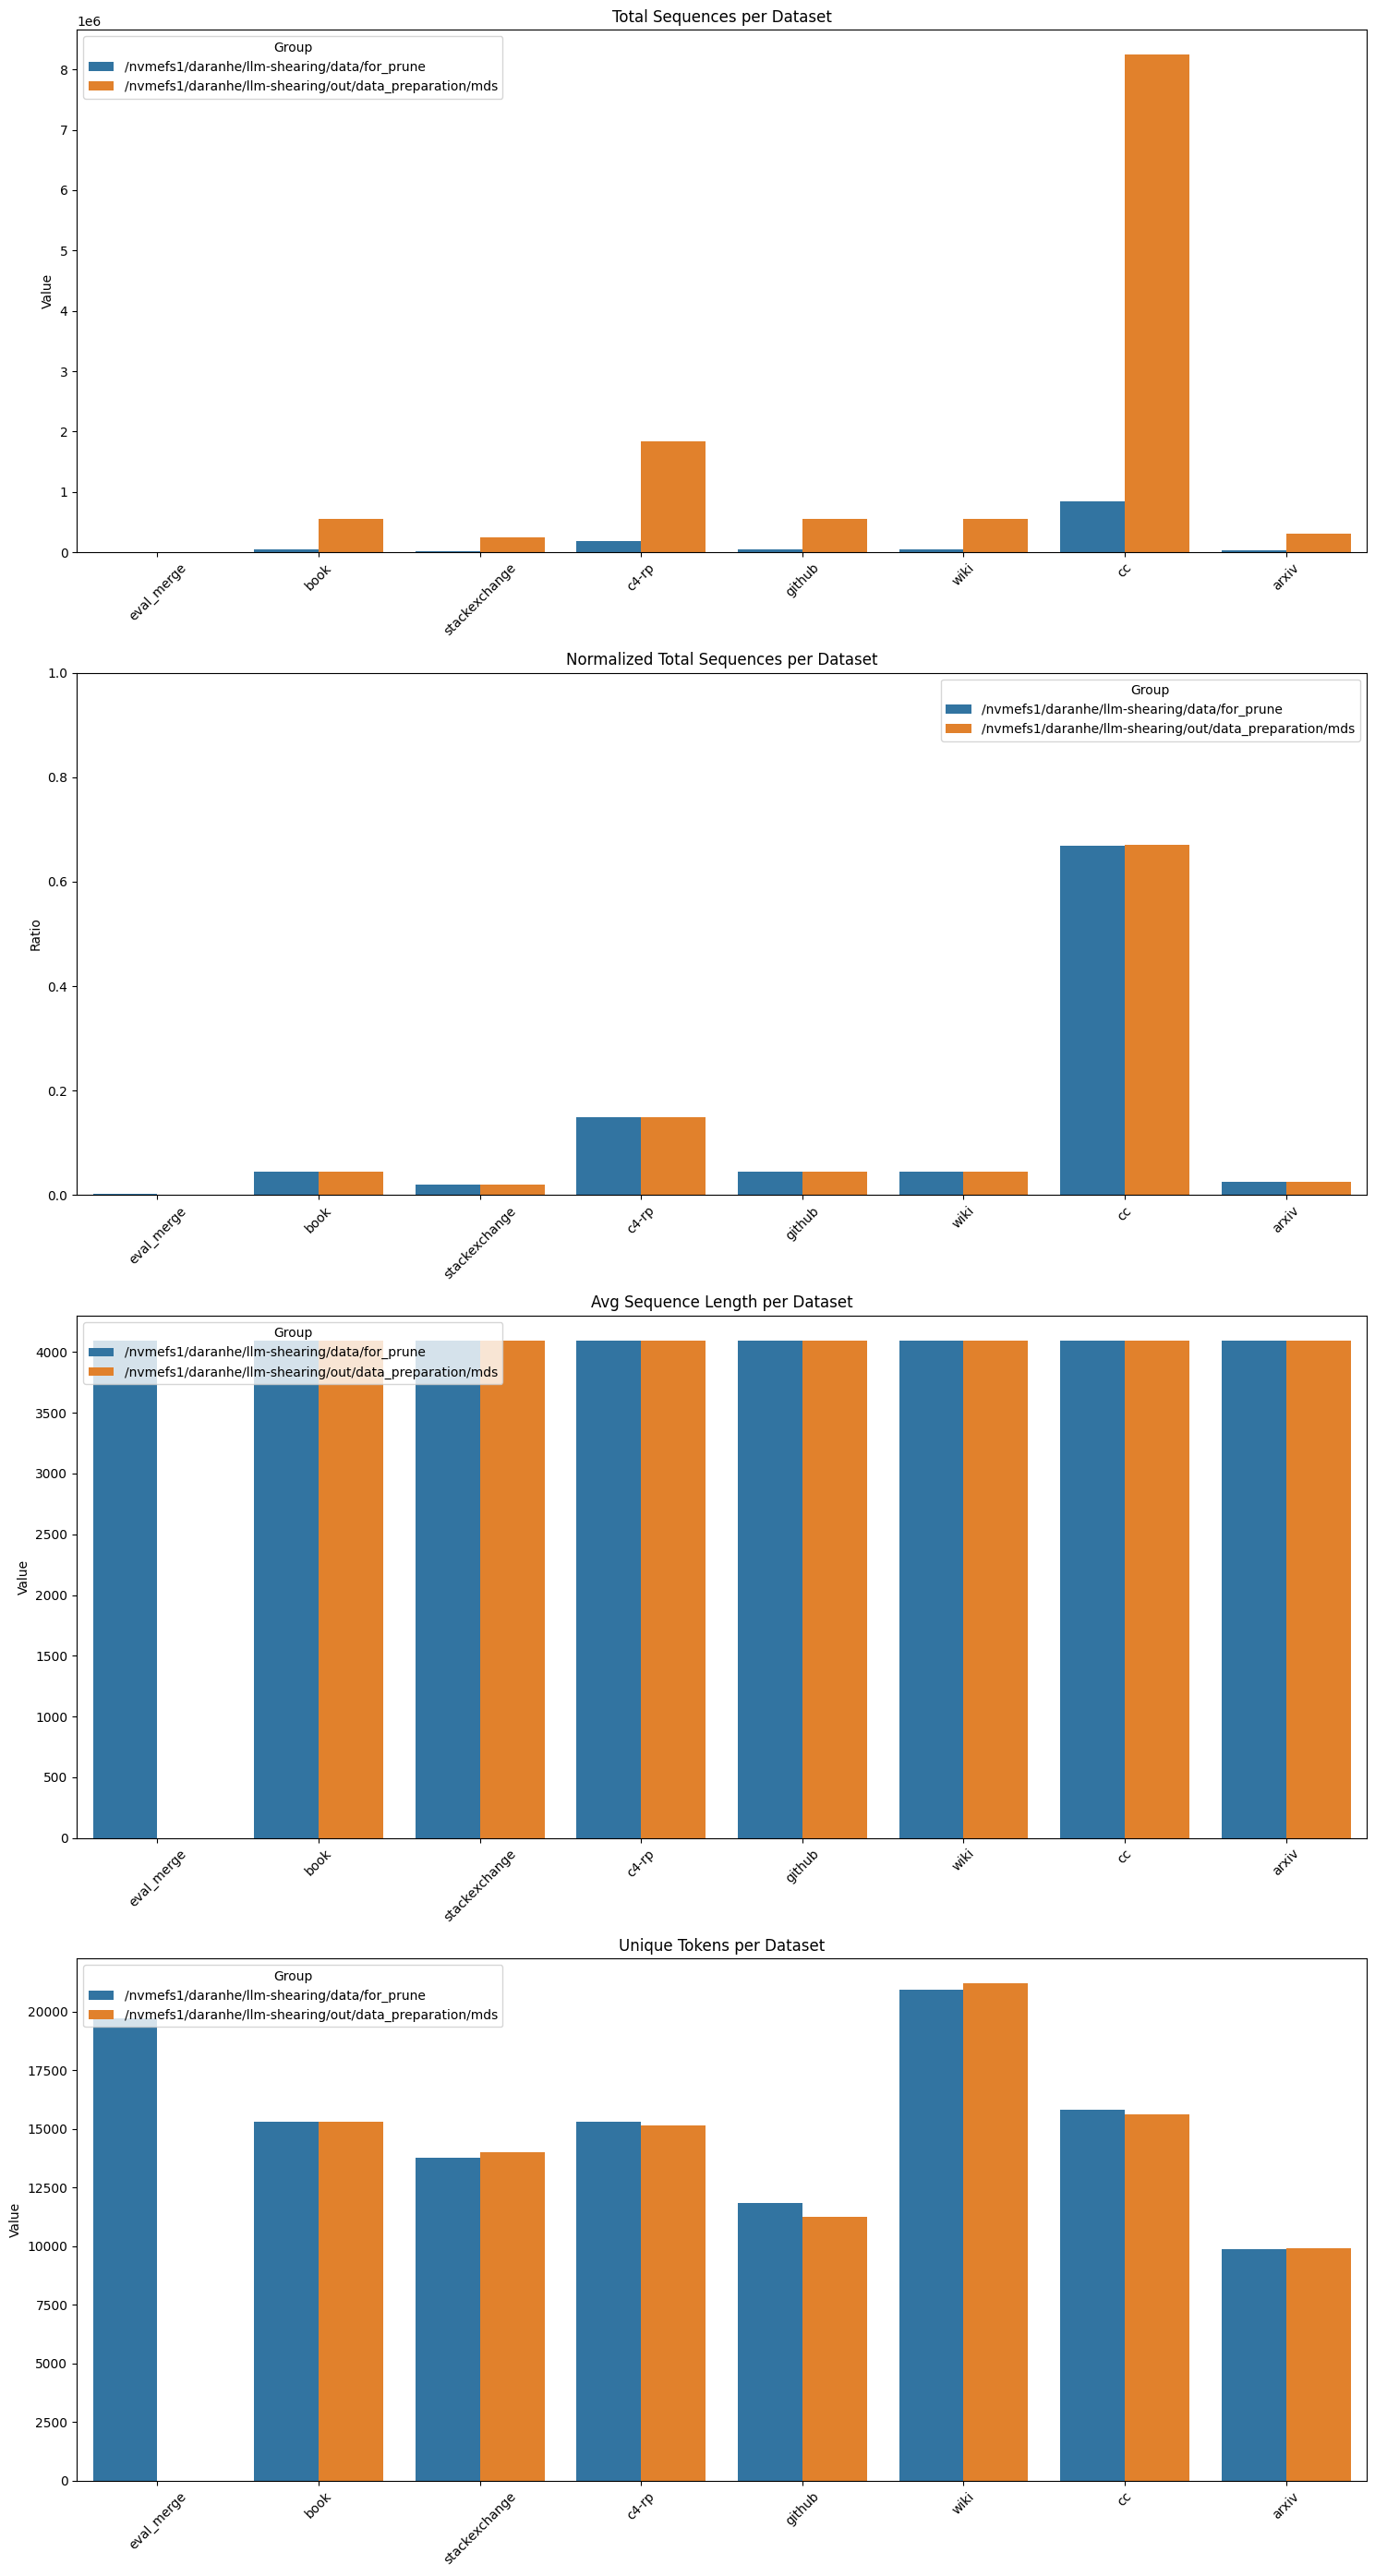

TypeError: Object of type int64 is not JSON serializable

In [1]:
from validator import validate_mds_datasets

# validate_mds_datasets("/nvmefs1/daranhe/llm-shearing/out/data_preparation/mds")
roots = [
    "/nvmefs1/daranhe/llm-shearing/data/for_prune",
    "/nvmefs1/daranhe/llm-shearing/out/data_preparation/mds",
]
validate_mds_datasets(roots, n_samples=100)